In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install gTTS

In [ ]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=fcd4d55ab5f3f5b53cdfa94bebd16566ca45669677ca563adb6e02e00918a2f0
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
import numpy as np
from gtts import gTTS
from IPython import display
from playsound import playsound
import pandas as pd
import cv2
from glob import glob
from collections import Counter
import string
import collections
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from PIL import Image

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [ ]:
images_path = '/content/drive/MyDrive/Minor Dataset/Images_1/'
images = glob(images_path+'*.jpg')
len(images)


8091

In [ ]:
images_path

'/content/drive/MyDrive/Minor Dataset/Images_1/'

In [ ]:
images[:5]

['/content/drive/MyDrive/Minor Dataset/Images_1/397982550_cf9f5cdb74.jpg',
 '/content/drive/MyDrive/Minor Dataset/Images_1/399246804_b4b5dc70e1.jpg',
 '/content/drive/MyDrive/Minor Dataset/Images_1/405970010_8cebaa77d3.jpg',
 '/content/drive/MyDrive/Minor Dataset/Images_1/381514859_b40418d9c3.jpg',
 '/content/drive/MyDrive/Minor Dataset/Images_1/400851260_5911898657.jpg']

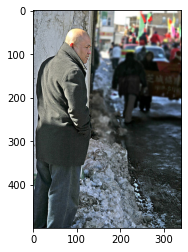

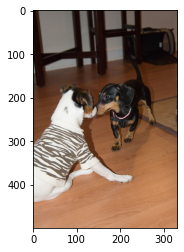

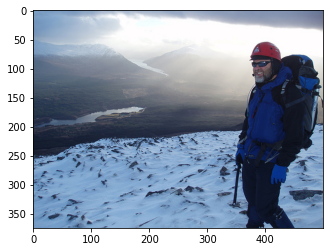

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
caption_path = '/content/drive/MyDrive/Minor Dataset/captions.txt'
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40457

In [ ]:
captions[:10]

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .']

In [ ]:
captions[1].split(',')[0]

'1000268201_693b08cb0e.jpg'

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0] 
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

0

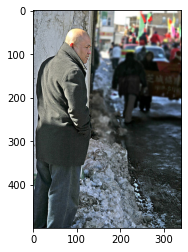

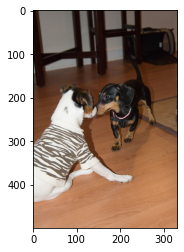

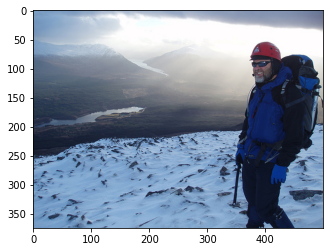

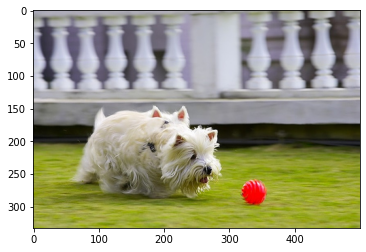

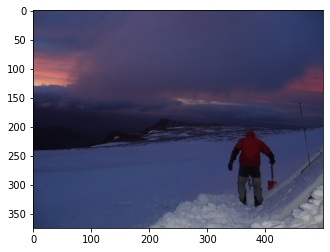

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
img_path = '/content/drive/MyDrive/Minor Dataset/Images_1/'

all_img_id = [] 
all_img_vector = [] 
annotations = [] 

with open('/content/drive/MyDrive/Minor Dataset/captions.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,/content/drive/MyDrive/Minor Dataset/Images_1/...,A rock climber in a red shirt


In [ ]:
vocabulary = [word.lower() for line in annotations for word in line.split()]
val_count = Counter(vocabulary) 
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

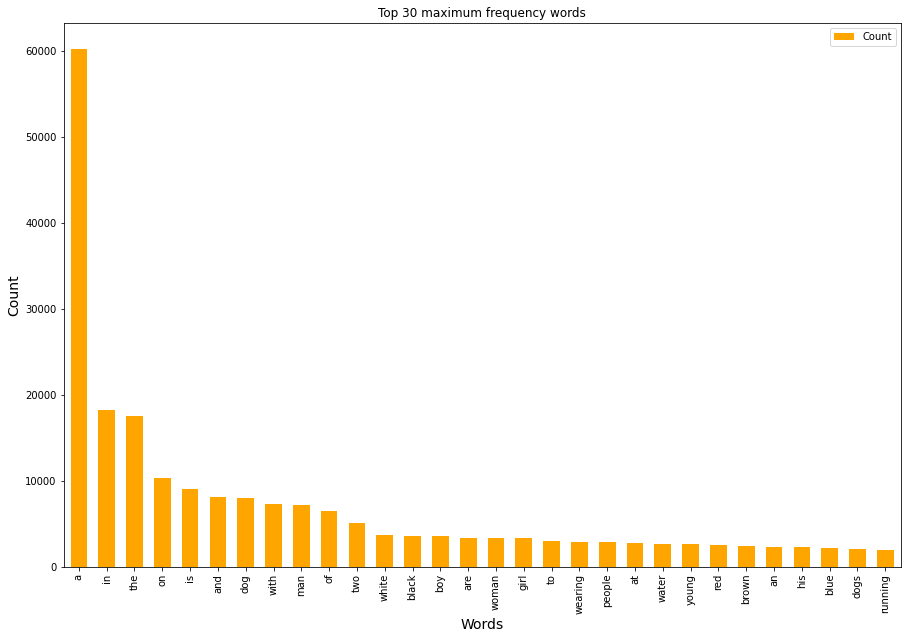

In [ ]:
for word, count in val_count.most_common(30):#Visualise the top 30 occuring words in the captions
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words")
plt.xlabel("Words",fontsize = 14)
plt.ylabel("Count", fontsize = 14)

In [ ]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)

In [ ]:
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [ ]:
annotations[0:2]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>']

In [ ]:
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [ ]:
tokenizer.fit_on_texts(annotations) # Creating word-to-index and index-to-word mappings.

train_seqs = tokenizer.texts_to_sequences(annotations) #transform each text into a sequence of integers

In [ ]:
train_seqs[:1]

[[2, 43, 4, 88, 169, 7, 115, 52, 390, 12, 382, 4, 28, 1, 687, 3]]

In [ ]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


Text(0, 0.5, 'Counts')

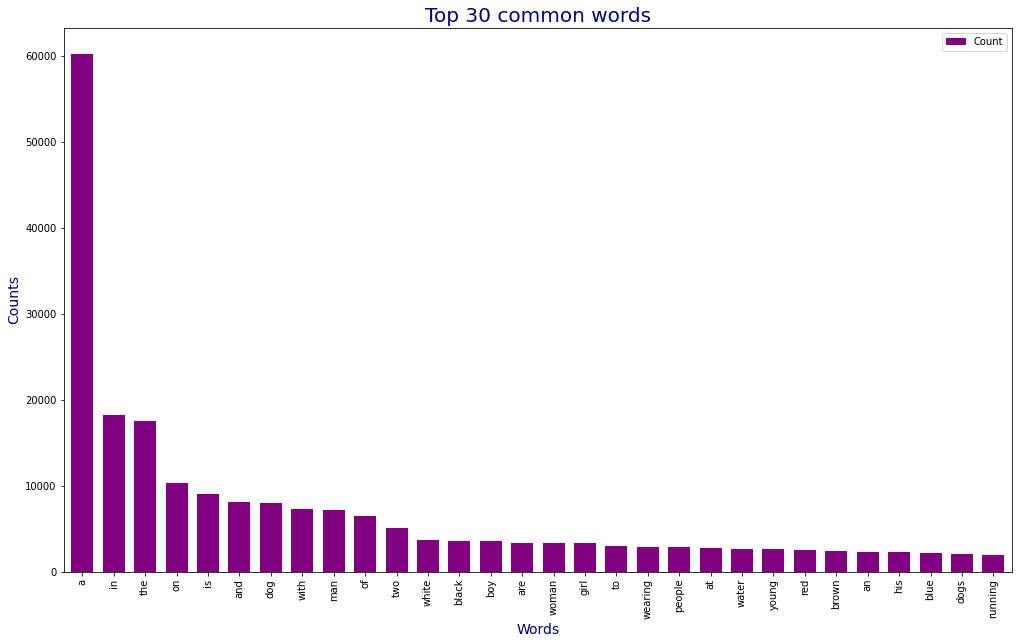

In [ ]:
# Creating a word count for our tokenizer to visualize the Top 30 occuring words after text processing
tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=.7,color = 'purple', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')


In [ ]:
# Pad each vector to the max_length of the captions store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


In [ ]:
preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [ ]:
for img in images[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


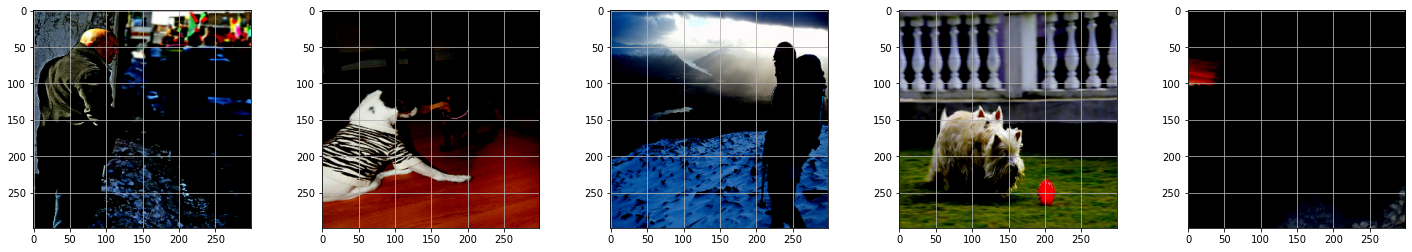

In [ ]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')

In [ ]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [ ]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)

In [ ]:
#Ratio = 80:20 and we will set random state = 42
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

87924736/87910968 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [03:22<00:00,  1.59s/it]


In [ ]:
batch_feat.shape

TensorShape([64, 2048])

In [ ]:
import more_itertools
top_5 = more_itertools.take(5, img_features.items())
top_5

[('/content/drive/MyDrive/Minor Dataset/Images_1/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16982874],
         [0.        , 0.        , 1.0105302 , ..., 0.        , 0.        ,
          0.06112188],
         ...,
         [0.        , 0.        , 2.038095  , ..., 1.2030528 , 0.        ,
          1.9927262 ],
         [0.        , 0.        , 0.90440774, ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2524443 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/content/drive/MyDrive/Minor Dataset/Images_1/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6637549 , 0.46285024, ..., 0.        , 0.        ,
          3.3321924 ],
         [0.        , 1.2269993 , 0.        , ..., 0.        , 0.2538826 ,
          3.329609  ],
         [1.2879965 , 1.519804

In [ ]:
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

# transform the created dataset(img_path,cap) to (features,cap)

(64, 64, 2048)
(64, 31)


In [ ]:
embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

In [ ]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) 
        
    def call(self, features):
        features =  self.dense(features)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features
encoder=Encoder(embedding_dim)
from keras.utils.vis_utils import plot_model


In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [ ]:
# define the optimizer, we take adam 
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
  
    
    return tf.reduce_mean(loss_)

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss


In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss

  3%|▎         | 1/30 [02:49<1:22:03, 169.79s/it]

For epoch: 1, the train loss is 1.434, & test loss is 1.199
Time taken for 1 epoch 169.73210263252258 sec

Test loss has been reduced from 100.000 to 1.199


  7%|▋         | 2/30 [03:57<51:06, 109.53s/it]  

For epoch: 2, the train loss is 1.106, & test loss is 1.054
Time taken for 1 epoch 67.33554482460022 sec

Test loss has been reduced from 1.199 to 1.054


 10%|█         | 3/30 [05:05<40:54, 90.90s/it] 

For epoch: 3, the train loss is 1.003, & test loss is 0.971
Time taken for 1 epoch 68.73234820365906 sec

Test loss has been reduced from 1.054 to 0.971


 13%|█▎        | 4/30 [06:14<35:39, 82.30s/it]

For epoch: 4, the train loss is 0.929, & test loss is 0.904
Time taken for 1 epoch 69.12308979034424 sec

Test loss has been reduced from 0.971 to 0.904


 17%|█▋        | 5/30 [07:24<32:17, 77.51s/it]

For epoch: 5, the train loss is 0.870, & test loss is 0.849
Time taken for 1 epoch 69.01878595352173 sec

Test loss has been reduced from 0.904 to 0.849


 20%|██        | 6/30 [08:33<29:51, 74.66s/it]

For epoch: 6, the train loss is 0.818, & test loss is 0.796
Time taken for 1 epoch 69.10804915428162 sec

Test loss has been reduced from 0.849 to 0.796


 23%|██▎       | 7/30 [09:42<27:55, 72.85s/it]

For epoch: 7, the train loss is 0.770, & test loss is 0.752
Time taken for 1 epoch 69.14098167419434 sec

Test loss has been reduced from 0.796 to 0.752


 27%|██▋       | 8/30 [10:51<26:17, 71.69s/it]

For epoch: 8, the train loss is 0.726, & test loss is 0.710
Time taken for 1 epoch 69.18578743934631 sec

Test loss has been reduced from 0.752 to 0.710


 30%|███       | 9/30 [12:00<24:49, 70.91s/it]

For epoch: 9, the train loss is 0.685, & test loss is 0.670
Time taken for 1 epoch 69.20056128501892 sec

Test loss has been reduced from 0.710 to 0.670


 33%|███▎      | 10/30 [13:09<23:27, 70.38s/it]

For epoch: 10, the train loss is 0.647, & test loss is 0.632
Time taken for 1 epoch 69.18512749671936 sec

Test loss has been reduced from 0.670 to 0.632


 37%|███▋      | 11/30 [14:18<22:09, 69.99s/it]

For epoch: 11, the train loss is 0.612, & test loss is 0.597
Time taken for 1 epoch 69.11046314239502 sec

Test loss has been reduced from 0.632 to 0.597


 40%|████      | 12/30 [15:28<20:55, 69.73s/it]

For epoch: 12, the train loss is 0.579, & test loss is 0.565
Time taken for 1 epoch 69.14158511161804 sec

Test loss has been reduced from 0.597 to 0.565


 43%|████▎     | 13/30 [16:37<19:41, 69.52s/it]

For epoch: 13, the train loss is 0.550, & test loss is 0.534
Time taken for 1 epoch 69.03881859779358 sec

Test loss has been reduced from 0.565 to 0.534


 47%|████▋     | 14/30 [17:46<18:30, 69.39s/it]

For epoch: 14, the train loss is 0.522, & test loss is 0.509
Time taken for 1 epoch 69.08445000648499 sec

Test loss has been reduced from 0.534 to 0.509


 50%|█████     | 15/30 [18:55<17:19, 69.30s/it]

For epoch: 15, the train loss is 0.497, & test loss is 0.483
Time taken for 1 epoch 69.08136916160583 sec

Test loss has been reduced from 0.509 to 0.483


 53%|█████▎    | 16/30 [20:04<16:09, 69.23s/it]

For epoch: 16, the train loss is 0.473, & test loss is 0.460
Time taken for 1 epoch 69.06088209152222 sec

Test loss has been reduced from 0.483 to 0.460


 57%|█████▋    | 17/30 [21:13<14:59, 69.18s/it]

For epoch: 17, the train loss is 0.452, & test loss is 0.440
Time taken for 1 epoch 69.05239534378052 sec

Test loss has been reduced from 0.460 to 0.440


 60%|██████    | 18/30 [22:22<13:49, 69.14s/it]

For epoch: 18, the train loss is 0.433, & test loss is 0.418
Time taken for 1 epoch 69.04038786888123 sec

Test loss has been reduced from 0.440 to 0.418


 63%|██████▎   | 19/30 [23:31<12:40, 69.13s/it]

For epoch: 19, the train loss is 0.415, & test loss is 0.402
Time taken for 1 epoch 69.12743282318115 sec

Test loss has been reduced from 0.418 to 0.402


 67%|██████▋   | 20/30 [24:40<11:31, 69.13s/it]

For epoch: 20, the train loss is 0.397, & test loss is 0.389
Time taken for 1 epoch 69.13016176223755 sec

Test loss has been reduced from 0.402 to 0.389


 70%|███████   | 21/30 [25:51<10:26, 69.64s/it]

For epoch: 21, the train loss is 0.383, & test loss is 0.374
Time taken for 1 epoch 70.80355954170227 sec

Test loss has been reduced from 0.389 to 0.374


 73%|███████▎  | 22/30 [27:00<09:16, 69.52s/it]

For epoch: 22, the train loss is 0.368, & test loss is 0.360
Time taken for 1 epoch 69.24458169937134 sec

Test loss has been reduced from 0.374 to 0.360


 77%|███████▋  | 23/30 [28:17<08:21, 71.57s/it]

For epoch: 23, the train loss is 0.355, & test loss is 0.345
Time taken for 1 epoch 76.35722398757935 sec

Test loss has been reduced from 0.360 to 0.345


 80%|████████  | 24/30 [29:28<07:08, 71.43s/it]

For epoch: 24, the train loss is 0.344, & test loss is 0.335
Time taken for 1 epoch 71.10317182540894 sec

Test loss has been reduced from 0.345 to 0.335


 83%|████████▎ | 25/30 [30:39<05:56, 71.37s/it]

For epoch: 25, the train loss is 0.333, & test loss is 0.322
Time taken for 1 epoch 71.22202205657959 sec

Test loss has been reduced from 0.335 to 0.322


 87%|████████▋ | 26/30 [31:49<04:43, 70.83s/it]

For epoch: 26, the train loss is 0.322, & test loss is 0.314
Time taken for 1 epoch 69.56513237953186 sec

Test loss has been reduced from 0.322 to 0.314


 90%|█████████ | 27/30 [32:58<03:30, 70.27s/it]

For epoch: 27, the train loss is 0.311, & test loss is 0.304
Time taken for 1 epoch 68.97050094604492 sec

Test loss has been reduced from 0.314 to 0.304


 93%|█████████▎| 28/30 [34:07<02:20, 70.06s/it]

For epoch: 28, the train loss is 0.304, & test loss is 0.292
Time taken for 1 epoch 69.54683589935303 sec

Test loss has been reduced from 0.304 to 0.292


 97%|█████████▋| 29/30 [35:16<01:09, 69.71s/it]

For epoch: 29, the train loss is 0.291, & test loss is 0.288
Time taken for 1 epoch 68.9024977684021 sec

Test loss has been reduced from 0.292 to 0.288


100%|██████████| 30/30 [36:25<00:00, 72.85s/it]

For epoch: 30, the train loss is 0.286, & test loss is 0.280
Time taken for 1 epoch 69.03852319717407 sec

Test loss has been reduced from 0.288 to 0.280


In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [ ]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
image_test = path_test.copy()
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)      
    pred_caption=' '.join(result).rsplit(' ', 1)[0]
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"\n\n BLEU score: {score*100}")
    print ('\n\n Real Caption:', real_caption)
    print ('\n\n Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)
    speech = gTTS('\n\n Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)




 BLEU score: 50.0


 Real Caption: people gather on bridge near UNK UNK tree


 Prediction Caption: some people are crossing green bridge over river


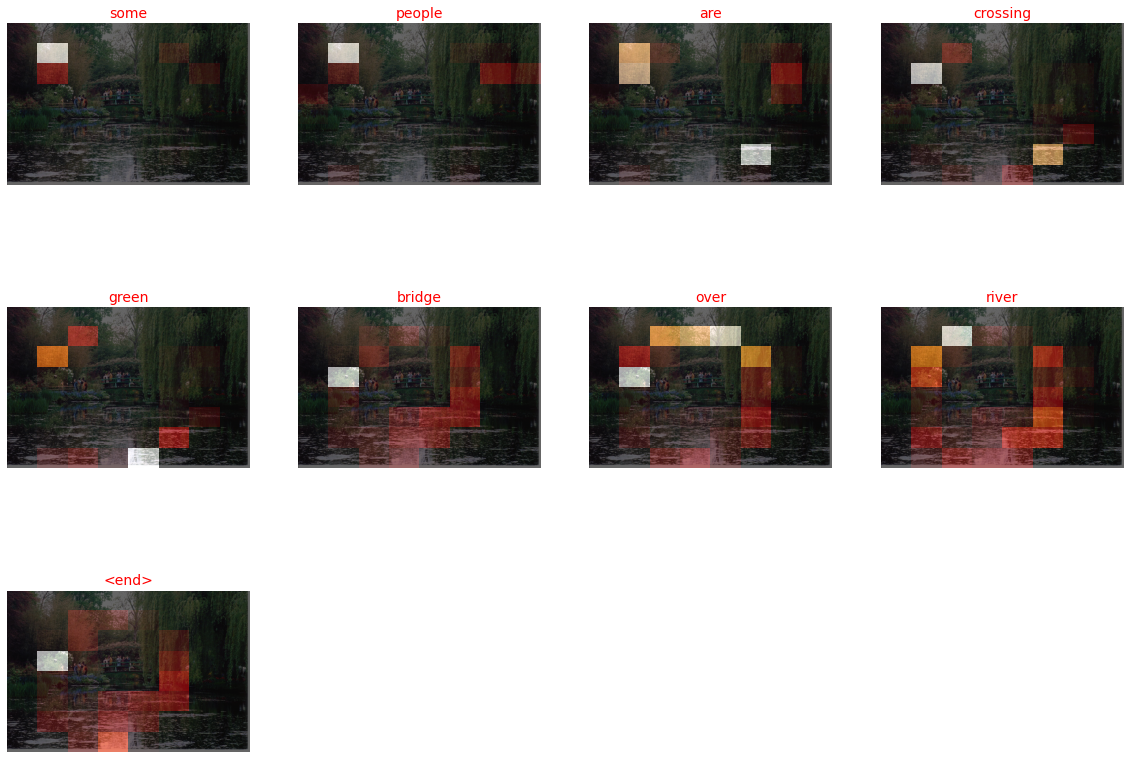

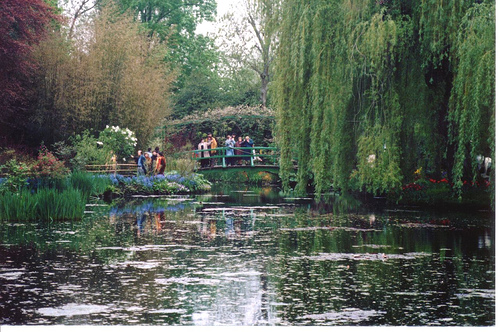

In [ ]:
Ttest_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(Ttest_image)